### Description:
In this notebook, my goal is to do some EDA on count of token found in all files. <br>

In **Stage 1: Import data**:<br>
I just import processed data I did in notebook **EDA_1_...** which has 4 columns: **FileName**, **Sentence**, 
**Clean sentence**, **Lemmatized**.<br>

In **Stage 2: Get tokens ferquencies across all files**:<br>
As ooposed to previous notebook **EDA_2_...**, I get counts of unique tokens in all of six files and explore them using bar charts.<br>
And again, I explore unique tokens counts from preprocessed columns **Clean sentence** and **Lemmatized**, in respective order.

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, ImageColorGenerator  #STOPWORDS

### Stage 1: Import processed data

In [2]:
# 1
# Import data
df = pd.read_csv("Processed_data.csv")

# 2
# Remove rows containing NaN
df = df[df['Clean sentence'].notnull()]

# 3
# Check data
print("DF shape:", df.shape)
df.head()

DF shape: (935, 4)


,FileName,Sentence,Clean sentence,Lemmatized
0,doc1.txt,Let me begin by saying thanks to all you who'v...,let me begin thanks traveled far wide brave co...,let i begin thank travel far wide brave cold t...
1,doc1.txt,We all made this journey for a reason.,journey reason,journey reason
2,doc1.txt,"It's humbling, but in my heart I know you didn...",humbling heart i know come me came believe cou...,humble heart i know come i come believe country
3,doc1.txt,"In the face of war, you believe there can be p...",face war believe peace,face war believe peace
4,doc1.txt,"In the face of despair, you believe there can ...",face despair believe hope,face despair believe hope


### Stage 2: Get tokens ferquencies across all files
For Clean sentence column

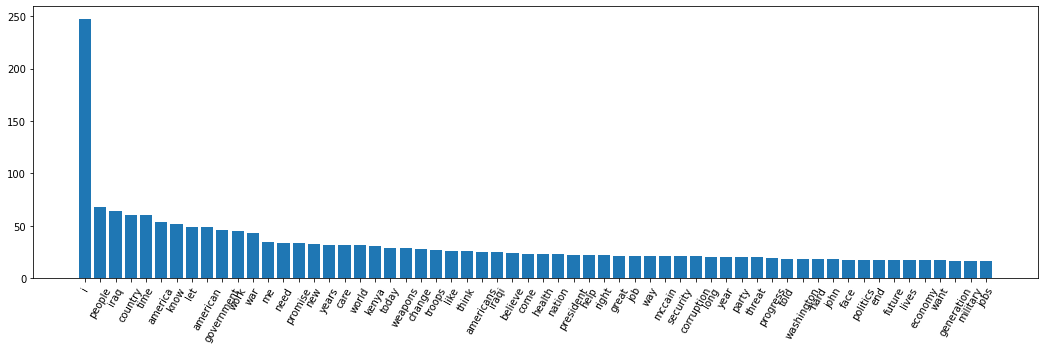

In [4]:
proc_tokens = []
for s in df["Clean sentence"].tolist():
    proc_tokens.extend(s.split())

# 5
# Sort token counts in desc order
term2freq = Counter(proc_tokens).most_common()

# 6.1
# Get top N common tokens
s = 60
tokens_ = [t for t,c in term2freq[:s]]
counts_ = [c for t,c in term2freq[:s]]

# 6.2
# Plot bar chart
y = range(len(tokens_))
plt.figure(figsize=(18,5))           # option to configure chrat size, this line should come first
plt.bar(y, counts_)
plt.xticks(y, tokens_, rotation=60)  # option to rotate bar names
plt.show()

### Plot WordCloud 1

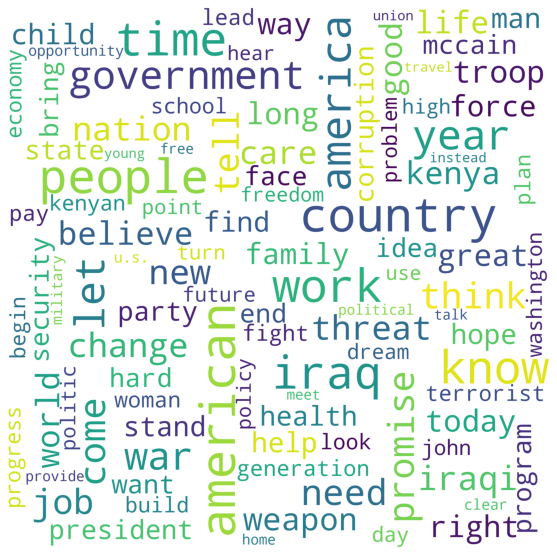

In [12]:
# Plot WordCloud
texts = " ".join(proc_tokens)

wordcloud = WordCloud(max_font_size=180, max_words=100,
                      width = 2000, height = 2000, 
                      background_color="white", 
                      collocations=False,      # ................... optional, whether to include collocations (bigrams). Ignored if using generate_from_frequencies
                      random_state=2, 
#                       stopwords = STOPWORDS,  # ................... optional, default=None
                      regexp="[^\s]+").generate(texts)  # .... regex can be custom if default does not suit 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Get tokens ferquencies across all files
For Lemmatized column

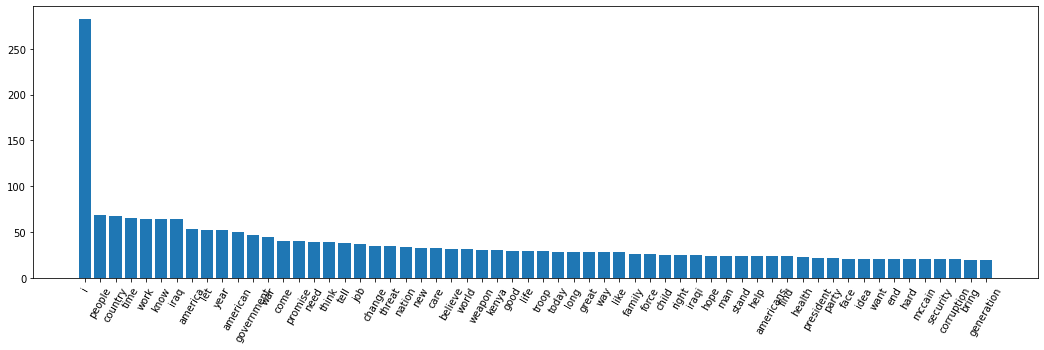

In [6]:
proc_tokens = []
for s in df["Lemmatized"].tolist():
    proc_tokens.extend(s.split())

# 5
# Sort token counts in desc order
term2freq = Counter(proc_tokens).most_common()

# 6.1
# Get top N common tokens
s = 60
tokens_ = [t for t,c in term2freq[:s]]
counts_ = [c for t,c in term2freq[:s]]

# 6.2
# Plot bar chart
y = range(len(tokens_))
plt.figure(figsize=(18,5))           # option to configure chrat size, this line should come first
plt.bar(y, counts_)
plt.xticks(y, tokens_, rotation=60)  # option to rotate bar names
plt.show()

### Plot WordCloud 2

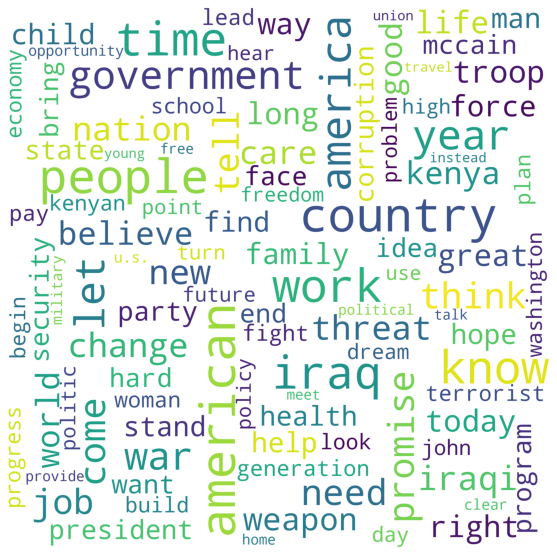

In [11]:
# Plot WordCloud
texts = " ".join(proc_tokens)

wordcloud = WordCloud(max_font_size=180, max_words=100,
                      width = 2000, height = 2000, 
                      background_color="white", 
                      collocations=False,      # ................... optional, whether to include collocations (bigrams). Ignored if using generate_from_frequencies
                      random_state=2, 
#                       stopwords = STOPWORDS,  # ................... optional, default=None
                      regexp="[^\s]+").generate(texts)  # .... regex can be custom if default does not suit 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()